In [1]:
import sys, os
sys.path.append("C:/users/kristijan/documents/projects/jhu1/")
sys.path.append("C:/users/kristijan/documents/projects/jhu1/data")
sys.path.append("C:/users/kristijan/documents/projects/jhu1/output")
os.chdir("C:/users/kristijan/documents/projects/jhu1/")
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
sns.set(font_scale=1.3)
from matplotlib import pyplot as plt
from stimuli import prefixes, prompts
import json

# Scenarios

### Mary in the park scenario
```python
# ===== MARY SCENARIO ===== #
# short context
a1 = ["After the meeting, she took a break and had a cup of coffee."]

# longer context
a2 = ["After the meeting, Mary went for a walk.",
      "It was a busy day and she needed a break.",
      "Outside was really beautiful and warm and the flowers in the park were blooming."]

a3 = ["While she was walking, she listened to the wonderful bird songs.",
     "During the walk, Mary could not stop thinking about the meeting.",
     "She was thinking about the discussions she had with her coworkers.",
     "Luckily, she met her neighbors Sarah and Ryan and they talked briefly.",
     "After they said goodbye, Mary started walking towards home."]
```

### Interference: "The ocean and its wonders (incongruent scenario)"

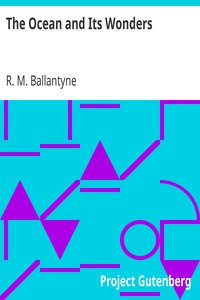  
https://www.gutenberg.org/ebooks/21754

```python
# ===== OCEAN SCENARIO ====#
b1 = ["There is a voice in the waters of the great sea. It calls to man continually."]

b2 = ["Sometimes it thunders in the tempest, when the waves leap high and strong and the wild winds shriek and roar.",
      "Sometimes it whispers in the calm, small voice, as if to solicit our regard."]

b3 = ["The sea has much to say; far more than could possibly be comprehended in one volume, however large.",
      "It tells us of the doings of man on its broad bosom, from the day in which he first ventured to paddle along shore "
      "to the day when he launched his great iron ship, "
      "and rushed out to sea."]

b4 = ["Before proceeding to the consideration of the wonders connected with and contained in the sea, "
      "we shall treat of the composition of the sea itself and of its extent, depth, and bottom.",
      "What is the sea made of?",
      "Salt water, is the ready reply that rises naturally to every lip.",
      "But to this we add the question, what is salt water?",
      "To these queries we give the following reply, which, we doubt not, will rather surprise some of our readers.",
      "The salt of the ocean varies considerably in different parts."]

```

In [2]:
# read in the outputs created in outputs4dataframe.py
gpt = pd.read_csv("./output/output_gpt2.csv", sep="\t", index_col=0)
rnn = pd.read_csv("./output/output_rnn.csv", sep="\t", index_col=0)

### Intact context

In [3]:
stimulus_id = 92 # let's pick a trial
selection = ((gpt.sentid==stimulus_id) & (gpt.second_list=="repeat") & (gpt.list=="random") & (gpt.context=="intact"))
for i in range(4):
    print("{}: ".format(i) + " ".join(gpt.loc[(gpt.marker == i) & selection].token.tolist()).strip())

0: Before  the  meeting  Mary  wrote  down  the  following  list  of  words
1: farmer  contest  outline  success  orange
2: After  the  meeting  Mary  went  for  a  walk  It  was  a  busy  day  and  she  needed  a  break  Outside  was  really  beautiful  and  warm  and  the  flowers  in  the  park  were  blo oming  When  she  got  back  she  read  the  list  again
3: farmer  contest  outline  success  orange


### Scrambled context

In [4]:
stimulus_id = 92 # let's pick a trial
selection = ((gpt.sentid==stimulus_id) & (gpt.second_list=="repeat") & (gpt.list=="random") & (gpt.context=="scrambled"))
for i in range(4):
    print("{}: ".format(i) + " ".join(gpt.loc[(gpt.marker == i) & selection].token.tolist()).strip())

0: Before  the  meeting  Mary  wrote  down  the  following  list  of  words
1: farmer  contest  outline  success  orange
2: Outside  the  the  beautiful  and  park  flowers  blo oming  were  in  and  was  warm  really  After  walk  for  Mary  the  a  went  meeting  It  needed  busy  break  she  day  was  a  and  a  When  she  got  back  she  read  the  list  again
3: farmer  contest  outline  success  orange


### Incongruent context

In [15]:
stimulus_id = 91 # let's pick a trial
selection = ((gpt.sentid==stimulus_id) & (gpt.second_list=="repeat") & (gpt.list=="random") & (gpt.context=="incongruent"))
for i in range(4):
    print("{}: ".format(i) + " ".join(gpt.loc[(gpt.marker == i) & selection].token.tolist()).strip())

0: Before  the  meeting  Mary  wrote  down  the  following  list  of  words
1: darkness  football  olive  clothing  pony
2: Sometimes  it  th unders  in  the  temp est  when  the  waves  leap  high  and  strong  and  the  wild  winds  shri ek  and  roar  Sometimes  it  whispers  in  the  calm  small  voice  as  if  to  solicit  our  regard  When  she  got  back  she  read  the  list  again
3: darkness  football  olive  clothing  pony


In [6]:
# define a wrapper function
def make_plot(data_frame, list_type, title, palette="flare"):
    
    sns.set_style("white")
    p = sns.catplot(data=data_frame, kind="point", x="marker_pos_rel", y="surp", hue="prompt_len", col="second_list", row="context",
                    estimator=np.mean, ci=95.0,
                    col_order=["repeat", "permute", "control"],
                    row_order=["intact", "incongruent", "scrambled",],
                    palette=palette)
    p.fig.set_size_inches(18,8)  
    p.fig.subplots_adjust(top=0.85)
    p.fig.suptitle(title)
    p.set_axis_labels( "token position in list (index)" , "mean surprisal\n(+/-95 ci)")
    p._legend.set_title("prompt length\n(n. tokens)")
    p.set_titles("context = {row_name} | list = {col_name}")
    p.despine(left=True);

## Averaging across time

### RNN

In [7]:
data = None
# select the final 5 tokens
selection = (rnn.marker.isin([1, 3])) & (rnn.list_len==10) & (rnn.marker_pos_rel.isin(list(range(5, 10)))) & (rnn.context=="intact")
data = rnn.loc[selection].copy()

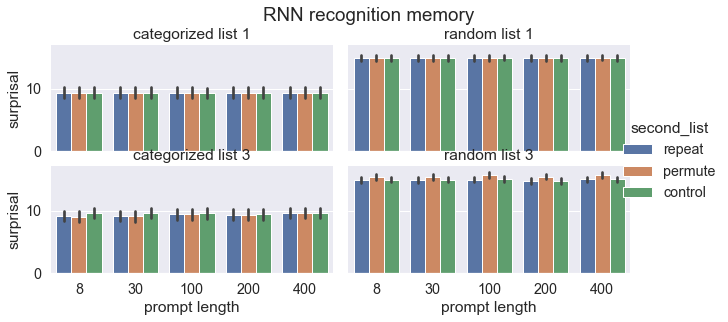

In [8]:
# f, ax = plt.subplots(figsize=(14, 5))
g=sns.catplot(kind="bar", data=data, estimator=np.mean, ci=95.0, x="prompt_len", y="surp", hue="second_list", col="list", row="marker",
              palette=sns.color_palette(),
              hue_order=["repeat", "permute", "control"])
g.fig.suptitle("RNN recognition memory")
g.fig.subplots_adjust(top=0.85)
g.fig.set_size_inches(10,4)
(g.set_axis_labels("prompt length", "surprisal")
  .set_titles("{col_name} list {row_name}")
  .despine(left=True));

### GPT-2

In [9]:
data = None
# select the final 5 tokens in lists of 10
selection = (gpt.marker.isin([1,3])) & (gpt.list_len==10) & (gpt.marker_pos_rel.isin(list(range(5, 10)))) & (gpt.context=="intact")
data = gpt.loc[selection].copy()

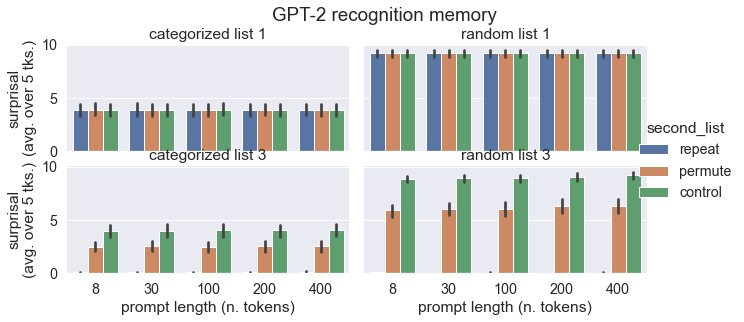

In [10]:
# f, ax = plt.subplots(figsize=(14, 5))
g=sns.catplot(kind="bar", data=data, estimator=np.mean, ci=95.0, x="prompt_len", y="surp", hue="second_list", col="list", row="marker",
              hue_order=["repeat", "permute", "control"],
              palette=sns.color_palette(),
              legend_out=True)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("GPT-2 recognition memory") 
g.fig.set_size_inches(10,4)
(g.set_axis_labels("prompt length (n. tokens)", "surprisal\n(avg. over 5 tks.)")
  .set_titles("{col_name} list {row_name}")
  .despine(left=True));

## RNN

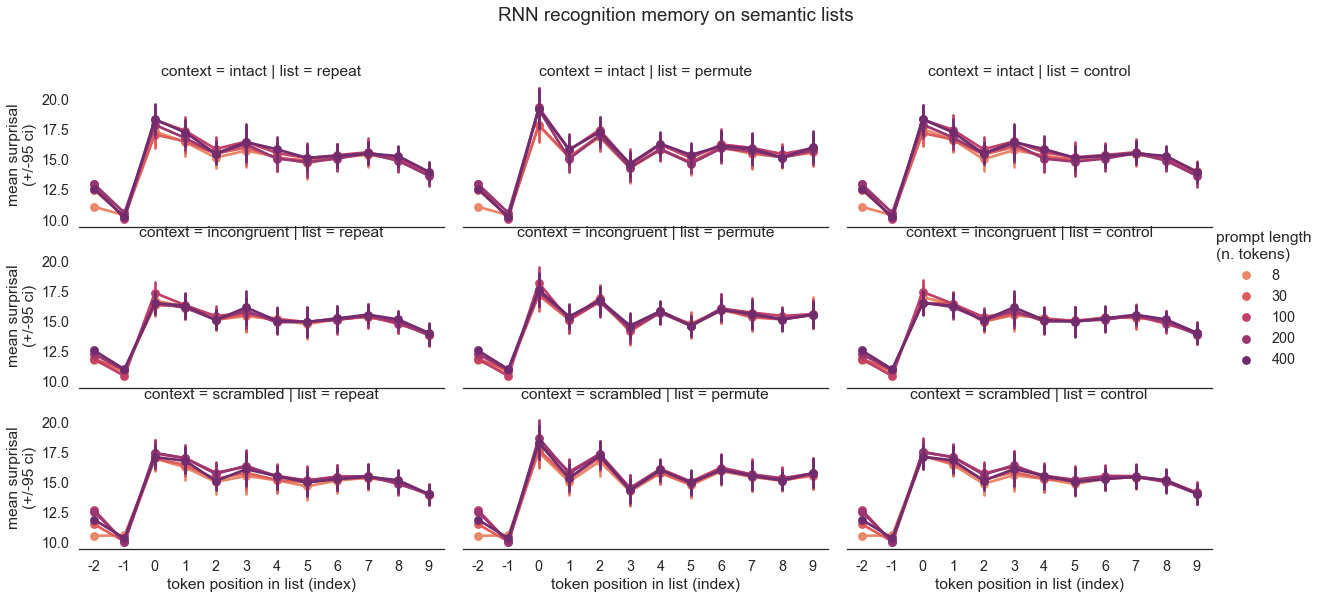

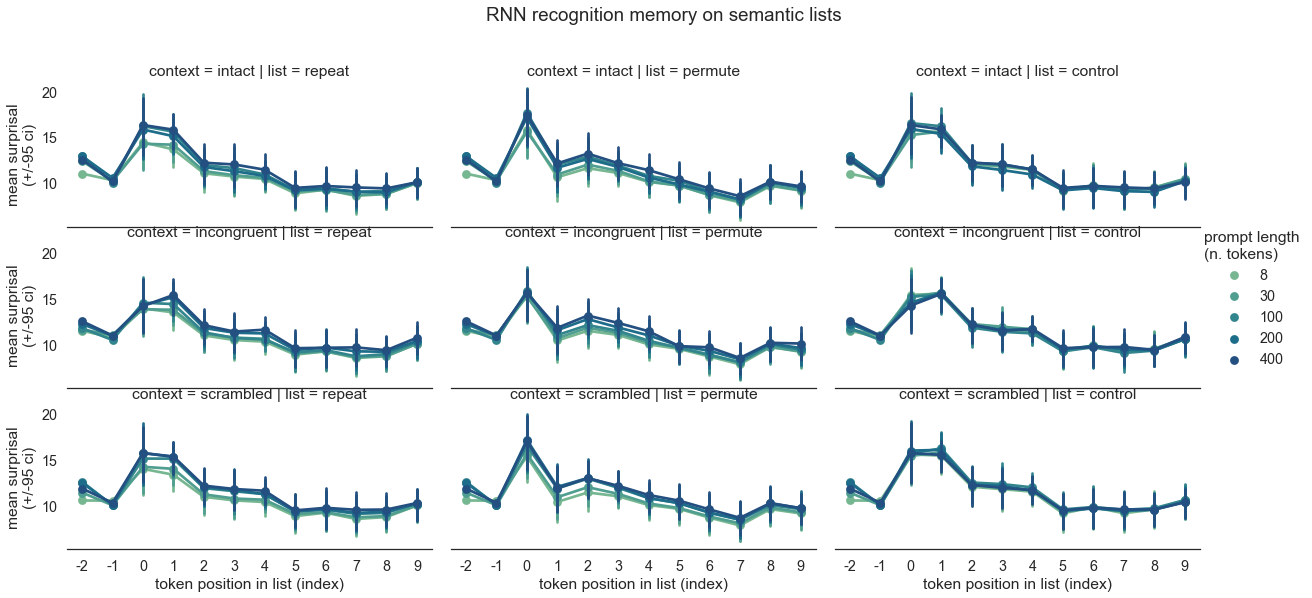

In [11]:
cmap = {"random": "flare", "categorized": "crest"}
for c in cmap.keys():
    for l in [10]:
        data=None
        list_len=l
        list_type = c
        selection = (rnn.marker.isin([2, 3])) & (rnn.marker_pos_rel.isin(list(range(-2, l)))) & \
                    (rnn.list_len==list_len) & (rnn.list==list_type)
        data = rnn.loc[selection].copy()  # list of len 10
        make_plot(data, list_type, title="RNN recognition memory on semantic lists".format(list_type), palette=cmap[c])

## GPT-2

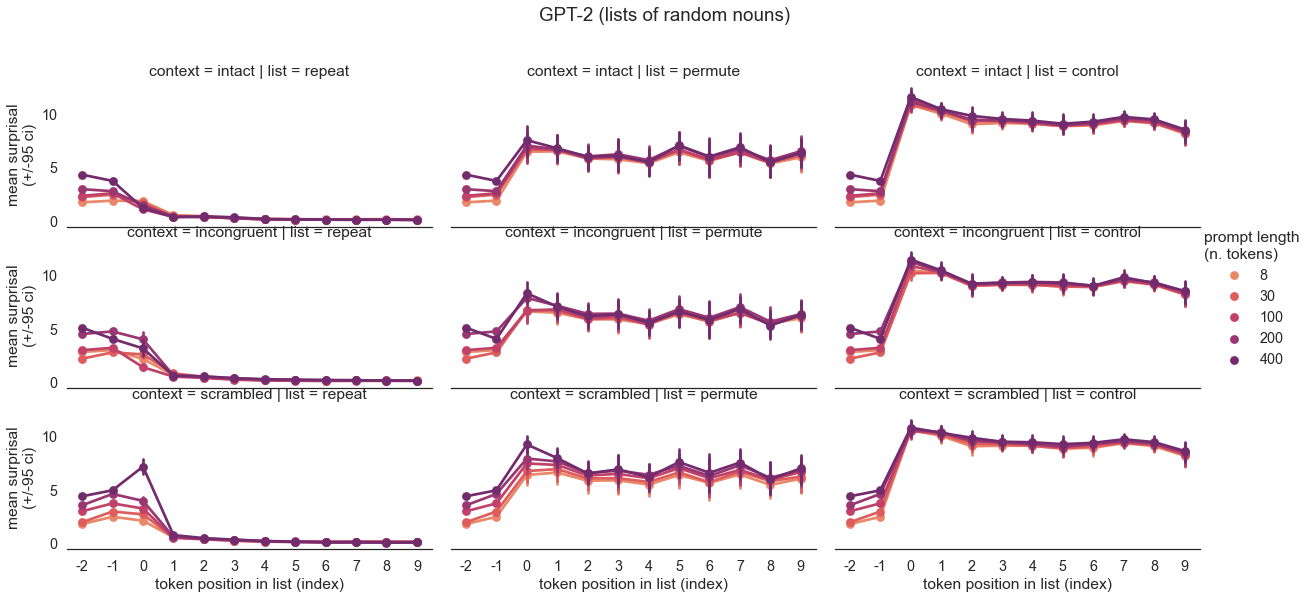

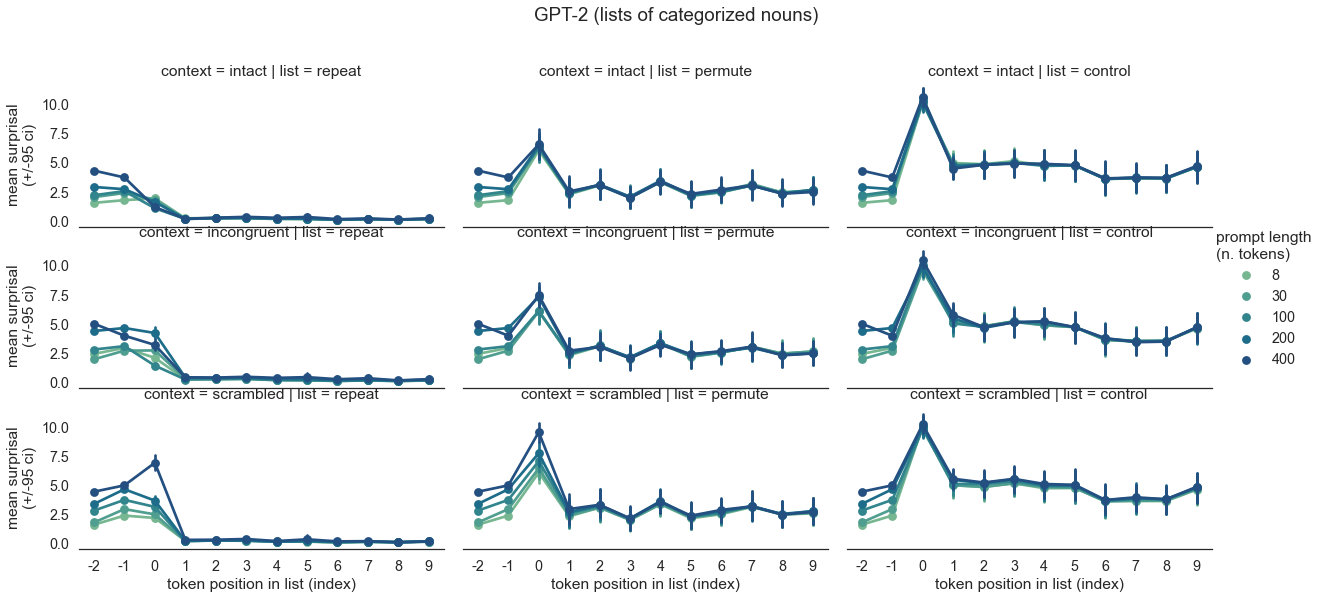

In [13]:
cmap = {"random": "flare", "categorized": "crest"}
for c in cmap.keys():
    for l in [10]:
        data=None
        list_len=l
        list_type = c
        selection = (gpt.marker.isin([2, 3])) & (gpt.marker_pos_rel.isin(list(range(-2, l)))) & \
                    (gpt.list_len==list_len) & (gpt.list==list_type)
        data = gpt.loc[selection].copy()  # list of len 10
        make_plot(data, list_type, title="GPT-2 (lists of {} nouns)".format(list_type), palette=cmap[c])